<a href="https://colab.research.google.com/github/arnavwasnik/arnavwasnik-A/blob/main/Financial_Market_News_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Financial Market News Sentiment Analysis



Objective

To analyze sentiment from financial news articles and assess its impact on market trends using natural language processing (NLP) techniques.



Data Source
The dataset can be obtained from various sources, such as:

Kaggle: Financial news datasets


Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

Import Data


In [9]:
# Step 3: Import Data
from google.colab import files
uploaded = files.upload()  # Upload your CSV file here

# Load the dataset without headers if needed
df = pd.read_csv('all-data.csv', header=None, encoding='ISO-8859-1')

# Set appropriate column names
df.columns = ['neutral', 'news']  # Adjust the names according to your data

# Display the first few rows and column names
print(df.head())
print(df.columns)


Saving all-data.csv to all-data (3).csv
    neutral                                               news
0   neutral  According to Gran , the company has no plans t...
1   neutral  Technopolis plans to develop in stages an area...
2  negative  The international electronic industry company ...
3  positive  With the new production plant the company woul...
4  positive  According to the company 's updated strategy f...
Index(['neutral', 'news'], dtype='object')



Describe Data


In [10]:
# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment(text):
    return sid.polarity_scores(text)

# Apply the function to the news column
df['sentiment'] = df['news'].apply(get_sentiment)

# Expand sentiment dictionary into separate columns
sentiment_df = df['sentiment'].apply(pd.Series)
df = pd.concat([df, sentiment_df], axis=1)

# Display the DataFrame with new sentiment columns
print(df.head())


    neutral                                               news  \
0   neutral  According to Gran , the company has no plans t...   
1   neutral  Technopolis plans to develop in stages an area...   
2  negative  The international electronic industry company ...   
3  positive  With the new production plant the company woul...   
4  positive  According to the company 's updated strategy f...   

                                           sentiment    neg    neu    pos  \
0  {'neg': 0.092, 'neu': 0.837, 'pos': 0.071, 'co...  0.092  0.837  0.071   
1  {'neg': 0.073, 'neu': 0.927, 'pos': 0.0, 'comp...  0.073  0.927  0.000   
2  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  0.000  1.000  0.000   
3  {'neg': 0.038, 'neu': 0.66, 'pos': 0.302, 'com...  0.038  0.660  0.302   
4  {'neg': 0.0, 'neu': 0.853, 'pos': 0.147, 'comp...  0.000  0.853  0.147   

   compound  
0   -0.1280  
1   -0.2960  
2    0.0000  
3    0.8555  
4    0.6705  


Data Visualization

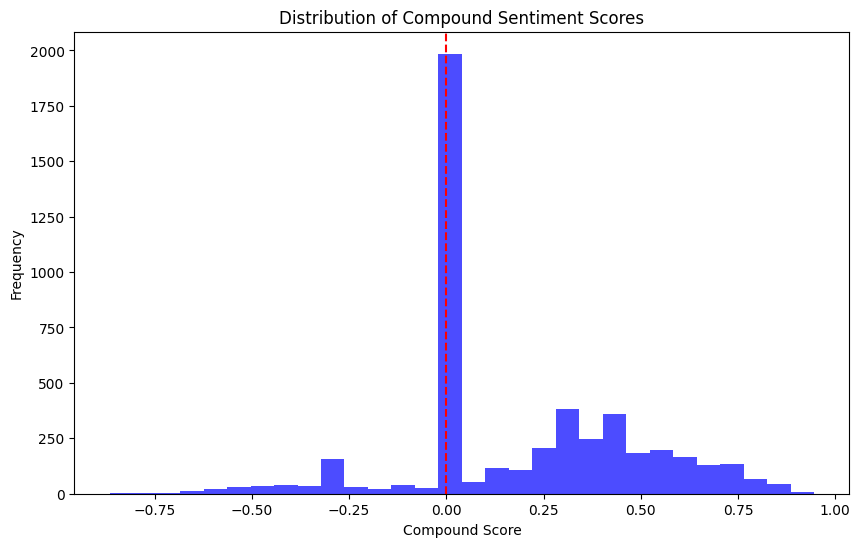

In [11]:
# Step 5: Data Visualization
import matplotlib.pyplot as plt

# Visualize the distribution of sentiment scores
plt.figure(figsize=(10, 6))
plt.hist(df['compound'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Compound Sentiment Scores')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--')  # Line at zero for reference
plt.show()

# Additional visualizations can include trends over time if you have timestamps


Data Preprocessing

In [12]:
# Step 6: Data Preprocessing
df['news'] = df['news'].astype(str).str.lower()  # Convert to lowercase
df.dropna(subset=['news'], inplace=True)  # Drop rows with missing news articles

# Optionally remove punctuation or apply more advanced text processing
import string
df['news'] = df['news'].str.replace('[{}]'.format(string.punctuation), '', regex=True)


Define Target Variable (y) and Feature Variables (X)

In [13]:
# Step 7: Define Target Variable (y) and Feature Variables (X)
X = df['news']  # Features: news text
y = df['compound']  # Target variable: compound sentiment score


Train Test Split

In [14]:
# Step 8: Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Modeling

In [15]:
# Step 9: Modeling
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize the news text using Count Vectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Create and train the model
model = LinearRegression()
model.fit(X_train_vectorized, y_train)


LinearRegression()

Model Evaluation

In [16]:
# Step 10: Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.02656950508158255
R-squared: 0.6814304774930124


Prediction

In [17]:
# Step 11: Prediction
new_data = ["The market is expected to rise significantly."]  # Example news
new_data_vectorized = vectorizer.transform(new_data)  # Vectorize the new data
predicted_sentiment = model.predict(new_data_vectorized)
print(f'Predicted Sentiment: {predicted_sentiment}')


Predicted Sentiment: [0.05032624]


Explanation
Summarize your findings and insights from the analysis. Discuss any limitations or potential improvements.

Findings: Describe the relationship between news sentiment and market movements observed in your analysis.
Limitations: Acknowledge any challenges such as limited data, the simplicity of the model, or potential biases in the data.
Future Work: Suggest how the analysis could be expanded, perhaps by incorporating more advanced models like neural networks or using additional features such as timestamps for trend analysis